## ON THE INTERPRETATION OF LEARNING DYNAMICAL SYSTEMS

In [1]:
#---------------------------------------
# Load Libs
#---------------------------------------
import numpy as np
import scipy as sci
from matplotlib import pylab as plt
from matplotlib import cm

from sympy import Symbol, asin, sin
from scipy.special import ellipj, ellipk

In [2]:
#---------------------------------------
# Load utility functions
#---------------------------------------
import importlib
import utils 
importlib.reload(utils)
from utils import *

import helper 
importlib.reload(helper)
from helper import *

In [3]:
#---------------------------------------
# Load torch
#---------------------------------------
import torch
device = get_device()

Connected to a GPU


In [4]:
#---------------------------------------
# Set seed
#---------------------------------------
import torch.nn.init as init
np.random.seed(0)
torch.manual_seed(0)

## Example 1: The Simple Harmonic Oscillator 

In [5]:
#---------------------------------------
# Example 1: The Simple Harmonic Oscillator 
# Create Data
#---------------------------------------
anal_ts = np.linspace(0,50,1000)
Lambda = np.array(([0,1],[-1,0]))
#Lambda = np.array(([-0.1,1],[-1,-0.1]))
u0 = np.array(([0,1]))
data = solution_general_linear(Lambda=Lambda, u0=u0, ts=anal_ts)


# send to torch
torch_data = data_to_torch(data, device)

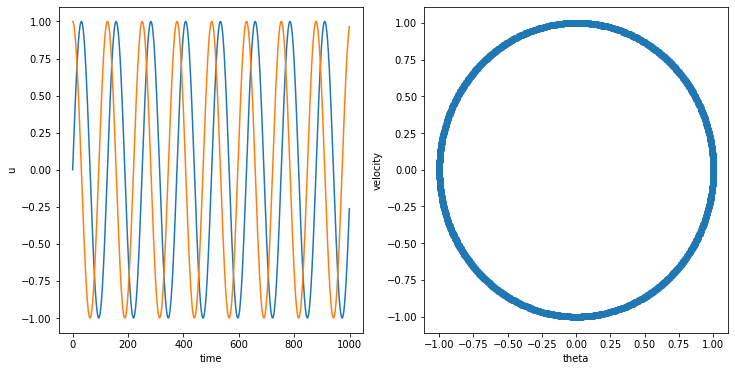

In [6]:
#---------------------------------------
# Plot Orbit and time series
#---------------------------------------
#fig, (ax1, ax2) = plt.subplots(1, 2)
FIG_SIZE_FULL = (12,6)
def trajectory_plots(trajs):
    plt.figure(figsize=FIG_SIZE_FULL)
    plt.subplot(1,2,1)
    for data in trajs:
        plt.plot(data)
    plt.ylabel('u')
    plt.xlabel('time')

    plt.subplot(1,2,2)
    for data in trajs:
        plt.scatter(data[:,0],data[:,1])
    plt.ylabel('velocity')
    plt.xlabel('theta')
trajectory_plots([data])

In [7]:
omega, losses = learn_omega(torch_data, batch_size=25, device=device)

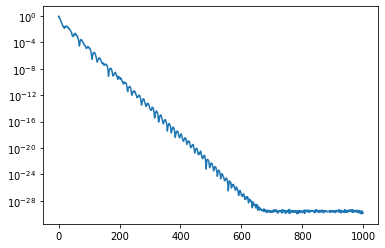

In [8]:
plt.semilogy(losses)

In [9]:
print('True Omega: \n', true_omega_linear(Lambda, dt=50/1000))
print('Lerned Omega: \n', omega.weight.data.cpu().numpy())

True Omega: 
 [[ 0.99875026  0.04997917]
 [-0.04997917  0.99875026]]
Lerned Omega: 
 [[ 0.99874776  0.05002916]
 [-0.05002916  0.99874776]]


In [ ]:
omegas = []

for i in range(10):
    omega_temp, loss = learn_omega(torch_data, batch_size=25, device=device)
    omegas.append( omega_temp.weight.data.cpu().numpy() )


## Example 2: The Damped Harmonic Oscillator 